## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates2_df = merged_df.loc[merged_df.duplicated(['Mouse ID','Timepoint']),:]
duplicates2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
trimmed_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'])
trimmed_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
len(trimmed_df['Mouse ID'].value_counts())

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_growth_df = trimmed_df[['Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Ramicane_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ramicane']
Ramicane_df_mean   = Ramicane_df['Tumor Volume (mm3)'].mean()
Ramicane_df_median = Ramicane_df['Tumor Volume (mm3)'].median()
Ramicane_df_var    = Ramicane_df['Tumor Volume (mm3)'].var()
Ramicane_df_stdev  = Ramicane_df['Tumor Volume (mm3)'].std()
Ramicane_df_sem    = Ramicane_df['Tumor Volume (mm3)'].sem()
Ramicane_df_count  = Ramicane_df['Tumor Volume (mm3)'].count()

Capomulin_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Capomulin']
Capomulin_df_mean   = Capomulin_df['Tumor Volume (mm3)'].mean()
Capomulin_df_median = Capomulin_df['Tumor Volume (mm3)'].median()
Capomulin_df_var    = Capomulin_df['Tumor Volume (mm3)'].var()
Capomulin_df_stdev  = Capomulin_df['Tumor Volume (mm3)'].std()
Capomulin_df_sem    = Capomulin_df['Tumor Volume (mm3)'].sem()
Capomulin_df_count  = Capomulin_df['Tumor Volume (mm3)'].count()

Ketapril_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ketapril']
Ketapril_df_mean   = Ketapril_df['Tumor Volume (mm3)'].mean()
Ketapril_df_median = Ketapril_df['Tumor Volume (mm3)'].median()
Ketapril_df_var    = Ketapril_df['Tumor Volume (mm3)'].var()
Ketapril_df_stdev  = Ketapril_df['Tumor Volume (mm3)'].std()
Ketapril_df_sem    = Ketapril_df['Tumor Volume (mm3)'].sem()
Ketapril_df_count  = Ketapril_df['Tumor Volume (mm3)'].count()

Naftisol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Naftisol']
Naftisol_df_mean   = Naftisol_df['Tumor Volume (mm3)'].mean()
Naftisol_df_median = Naftisol_df['Tumor Volume (mm3)'].median()
Naftisol_df_var    = Naftisol_df['Tumor Volume (mm3)'].var()
Naftisol_df_stdev  = Naftisol_df['Tumor Volume (mm3)'].std()
Naftisol_df_sem    = Naftisol_df['Tumor Volume (mm3)'].sem()
Naftisol_df_count  = Naftisol_df['Tumor Volume (mm3)'].count()

Zoniferol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Zoniferol']
Zoniferol_df_mean   = Zoniferol_df['Tumor Volume (mm3)'].mean()
Zoniferol_df_median = Zoniferol_df['Tumor Volume (mm3)'].median()
Zoniferol_df_var    = Zoniferol_df['Tumor Volume (mm3)'].var()
Zoniferol_df_stdev  = Zoniferol_df['Tumor Volume (mm3)'].std()
Zoniferol_df_sem    = Zoniferol_df['Tumor Volume (mm3)'].sem()
Zoniferol_df_count  = Zoniferol_df['Tumor Volume (mm3)'].count()

Placebo_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Placebo']
Placebo_df_mean   = Placebo_df['Tumor Volume (mm3)'].mean()
Placebo_df_median = Placebo_df['Tumor Volume (mm3)'].median()
Placebo_df_var    = Placebo_df['Tumor Volume (mm3)'].var()
Placebo_df_stdev  = Placebo_df['Tumor Volume (mm3)'].std()
Placebo_df_sem    = Placebo_df['Tumor Volume (mm3)'].sem()
Placebo_df_count  = Placebo_df['Tumor Volume (mm3)'].count()

Stelasyn_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Stelasyn']
Stelasyn_df_mean   = Stelasyn_df['Tumor Volume (mm3)'].mean()
Stelasyn_df_median = Stelasyn_df['Tumor Volume (mm3)'].median()
Stelasyn_df_var    = Stelasyn_df['Tumor Volume (mm3)'].var()
Stelasyn_df_stdev  = Stelasyn_df['Tumor Volume (mm3)'].std()
Stelasyn_df_sem    = Stelasyn_df['Tumor Volume (mm3)'].sem()
Stelasyn_df_count  = Stelasyn_df['Tumor Volume (mm3)'].count()

Infubinol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Infubinol']
Infubinol_df_mean   = Infubinol_df['Tumor Volume (mm3)'].mean()
Infubinol_df_median = Infubinol_df['Tumor Volume (mm3)'].median()
Infubinol_df_var    = Infubinol_df['Tumor Volume (mm3)'].var()
Infubinol_df_stdev  = Infubinol_df['Tumor Volume (mm3)'].std()
Infubinol_df_sem    = Infubinol_df['Tumor Volume (mm3)'].sem()
Infubinol_df_count  = Infubinol_df['Tumor Volume (mm3)'].count()

Ceftamin_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ceftamin']
Ceftamin_df_mean   = Ceftamin_df['Tumor Volume (mm3)'].mean()
Ceftamin_df_median = Ceftamin_df['Tumor Volume (mm3)'].median()
Ceftamin_df_var    = Ceftamin_df['Tumor Volume (mm3)'].var()
Ceftamin_df_stdev  = Ceftamin_df['Tumor Volume (mm3)'].std()
Ceftamin_df_sem    = Ceftamin_df['Tumor Volume (mm3)'].sem()
Ceftamin_df_count  = Ceftamin_df['Tumor Volume (mm3)'].count()

Propriva_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Propriva']
Propriva_df_mean   = Propriva_df['Tumor Volume (mm3)'].mean()
Propriva_df_median = Propriva_df['Tumor Volume (mm3)'].median()
Propriva_df_var    = Propriva_df['Tumor Volume (mm3)'].var()
Propriva_df_stdev  = Propriva_df['Tumor Volume (mm3)'].std()
Propriva_df_sem    = Propriva_df['Tumor Volume (mm3)'].sem()
Propriva_df_count  = Propriva_df['Tumor Volume (mm3)'].count()

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# included count to be used later
# This method is the most straighforward, creating multiple series and putting them all together at the end.
overall_drug_summary = pd.DataFrame(np.array([['Capomulin',Capomulin_df_mean,Capomulin_df_median,Capomulin_df_var,Capomulin_df_stdev,Capomulin_df_sem,Capomulin_df_count],
                                              ['Ramicane',Ramicane_df_mean,Ramicane_df_median,Ramicane_df_var,Ramicane_df_stdev,Ramicane_df_sem,Ramicane_df_count],
                                             ['Ketapril',Ketapril_df_mean,Ketapril_df_median,Ketapril_df_var,Ketapril_df_stdev,Ketapril_df_sem,Ketapril_df_count],
                                             ['Naftisol',Naftisol_df_mean,Naftisol_df_median,Naftisol_df_var,Naftisol_df_stdev,Naftisol_df_sem,Naftisol_df_count],
                                             ['Zoniferol',Zoniferol_df_mean,Zoniferol_df_median,Zoniferol_df_var,Zoniferol_df_stdev,Zoniferol_df_sem,Zoniferol_df_count],
                                             ['Placebo',Placebo_df_mean,Placebo_df_median,Placebo_df_var,Placebo_df_stdev,Placebo_df_sem,Placebo_df_count],
                                             ['Stelasyn',Stelasyn_df_mean,Stelasyn_df_median,Stelasyn_df_var,Stelasyn_df_stdev,Stelasyn_df_sem,Stelasyn_df_count],
                                             ['Infubinol',Infubinol_df_mean,Infubinol_df_median,Infubinol_df_var,Infubinol_df_stdev,Infubinol_df_sem,Infubinol_df_count],
                                             ['Ceftamin',Ceftamin_df_mean,Ceftamin_df_median,Ceftamin_df_var,Ceftamin_df_stdev,Ceftamin_df_sem,Ceftamin_df_count],
                                             ['Propriva',Propriva_df_mean,Propriva_df_median,Propriva_df_var,Propriva_df_stdev,Propriva_df_sem,Propriva_df_count]]),
                   columns=['Drug Regimen', 'mean', 'median','variance','std.ev','sem','count'])
overall_drug_summary

,Drug Regimen,mean,median,variance,std.ev,sem,count
0,Capomulin,40.67574114100001,41.557808879999996,24.947764120254856,4.9947736805840215,0.32934562340083096,230
1,Ramicane,40.2167450667105,40.67323554,23.486703952095255,4.846308280753016,0.3209546065084816,228
2,Ketapril,55.23563764047869,53.698742644999996,68.55357711244596,8.279708757706757,0.6038598237739696,188
3,Naftisol,54.331564658333306,52.509284609999995,66.17347898736509,8.13470829147334,0.5964657512424236,186
4,Zoniferol,53.236506551593415,51.818479325,48.53335538938606,6.966588504381901,0.5163978968332167,182
5,Placebo,54.03358078635358,52.28893409,61.16808293669701,7.821002681031187,0.5813305510593875,181
6,Stelasyn,54.23314911988949,52.43173664,59.45056167336598,7.7104190335782645,0.5731109332771458,181
7,Infubinol,52.88479510859551,51.82058438,43.12868412883606,6.5672432670669405,0.4922356938011383,178
8,Ceftamin,52.59117180960677,51.77615728,39.2901772732786,6.268187718414199,0.469820532752611,178
9,Propriva,52.39346338487179,50.909964985,43.138803497801035,6.56801366455651,0.5258619511360094,156


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# included count to be used later
# This method produces everything in a single groupby function
group_method_df = trimmed_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])
group_summary  = group_method_df.agg(mean=pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='mean'),
                          median= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='median'),
                          variance= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='var'),
                          std_dev= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='std'),
                          sem= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='sem'),
                          count= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='count'),)
group_summary.head(10)

,mean,median,variance,std_dev,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862,156
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [9]:
#group by time and Drug Regimen to provide insight into when mice drop from the study
group_with_time_df = trimmed_df[['Drug Regimen','Timepoint','Tumor Volume (mm3)']].groupby(['Drug Regimen','Timepoint'])
group_with_time_summary  = group_with_time_df.agg(mean=pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='mean'),
                          median= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='median'),
                          variance= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='var'),
                          std_dev= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='std'),
                          sem= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='sem'),
                          count= pd.NamedAgg(column='Tumor Volume (mm3)',aggfunc='count'),)
group_with_time_summary.head()

mean     median   variance   std_dev       sem  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000  0.000000  0.000000   
             5          44.266086  45.597064   5.030889  2.242964  0.448593   
             10         43.084291  43.421014  12.344133  3.513422  0.702684   
             15         42.064317  42.798160  16.878693  4.108369  0.838617   
             20         40.716325  40.716428  19.035028  4.362915  0.909731   

                        count  
Drug Regimen Timepoint         
Capomulin    0             25  
             5             25  
             10            25  
             15            24  
             20            23

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

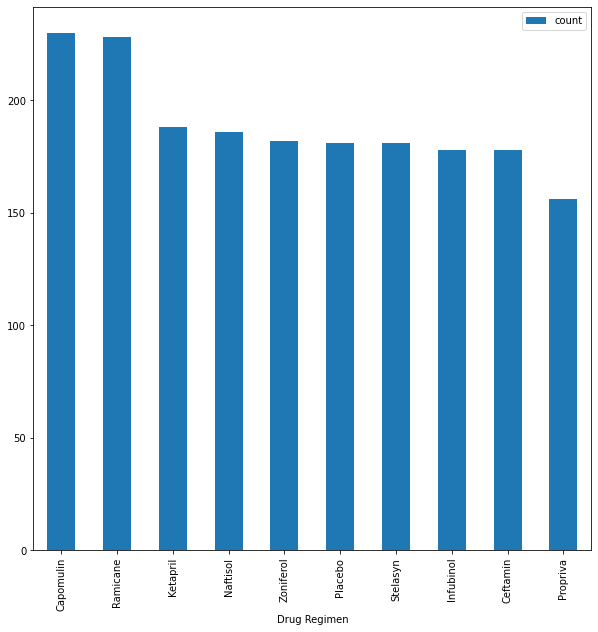

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart
#https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
overall_drug_summary['count']=overall_drug_summary['count'].astype(float)
overall_drug_summary.plot.bar(x="Drug Regimen",y='count' ,figsize=(10,10),)

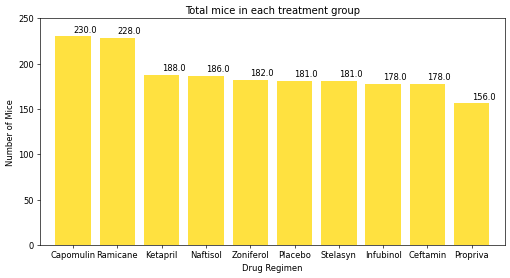

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig, ax = plt.subplots(figsize = (10,5), dpi=60)

x_axis = np.arange(0, len(overall_drug_summary))
tick_loc = []
y_axis = overall_drug_summary['count']
for x in x_axis:
    tick_loc.append(x)

plt.title('Total mice in each treatment group')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.xlim(-0.75,len(overall_drug_summary)-0.25)
plt.ylim(0,max(overall_drug_summary['count'])+20)


ax.bar(x_axis,y_axis, facecolor = 'Gold',alpha = 0.75,align='center')

for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+5 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.xticks(tick_loc,overall_drug_summary['Drug Regimen'])



plt.show()

<AxesSubplot:xlabel='Drug Regimen', ylabel='Count'>

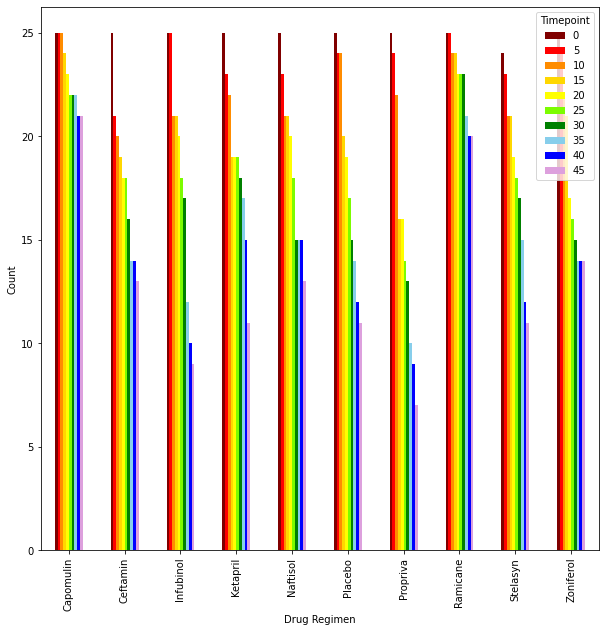

In [12]:
#personal visualisation of decline of mice over time
#https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
group_with_time_summary['count'].unstack().plot.bar(ylabel="Count",figsize=(10,10),
                         color = ['maroon','red','darkorange','gold','yellow',
                                 'lawngreen','green','skyblue','blue','plum'])

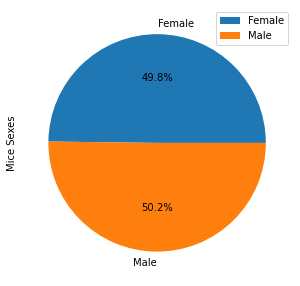

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
indvidual_mice_df = merged_df.drop_duplicates(['Mouse ID'])
sex_group_df = indvidual_mice_df.groupby(['Sex']).count()
sex_group_df["Mice Sexes"] = sex_group_df['Mouse ID']
plot = sex_group_df.plot.pie(y="Mice Sexes", figsize=(5, 5), autopct='%1.1f%%')


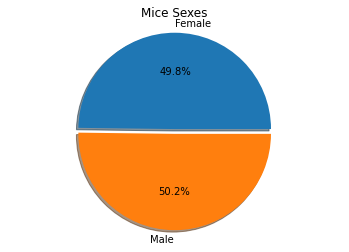

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mice Sexes")
explode = [0,0.05]
plt.pie(sex_group_df['Mice Sexes'],explode =explode ,  labels=sex_group_df.index.values,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_mouse_df = trimmed_df.drop_duplicates(subset = ['Mouse ID'], keep = 'last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# keep the mice that were in the four drug groups 
four_drug_df = last_mouse_df[last_mouse_df['Drug Regimen'].isin(options)]
#formating for easier reading at a glance
four_drug_df = four_drug_df.sort_values(by=['Drug Regimen'])
four_drug_df.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,j246,Capomulin,Female,21,21,35,38.753265,1
1,v923,Capomulin,Female,19,21,45,40.658124,2
2,w150,Capomulin,Male,23,23,10,39.952347,0
3,j119,Capomulin,Female,7,23,45,38.125164,1
4,l509,Capomulin,Male,17,21,45,41.483008,3
...,...,...,...,...,...,...,...,...
95,r921,Ramicane,Female,5,25,30,43.419381,1
96,w678,Ramicane,Female,5,24,5,43.166373,0
97,y449,Ramicane,Male,19,24,15,44.183451,0
98,r811,Ramicane,Male,9,19,45,37.225650,1


In [16]:

# create empty data frames to later seperate outliers from data
blank_df= pd.DataFrame(columns=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
outlier_df = blank_df
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in options:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = four_drug_df['Tumor Volume (mm3)'][four_drug_df['Drug Regimen'] == x].quantile([0.25,0.5,0.75])
    
    lowq  = quartiles[0.25]
    highq = quartiles[0.75]
    in_quart_r = highq - lowq
    lower_b = (lowq - (1.5*in_quart_r))
    upper_b = (highq + (1.5*in_quart_r))
    
    single_drug_df = four_drug_df[four_drug_df['Drug Regimen'] == x].reset_index(drop=True)
    for x in single_drug_df.index :
        
        tumor_vol = single_drug_df.loc[x,'Tumor Volume (mm3)']
        # Determine outliers using upper and lower bounds
        if (lower_b < tumor_vol < upper_b) :
            blank_df = blank_df.append(single_drug_df.loc[x,'Mouse ID':'Metastatic Sites'])
        if (tumor_vol <lower_b or upper_b< tumor_vol) :
            outlier_df = outlier_df.append(single_drug_df.loc[x,'Mouse ID':'Metastatic Sites'])

    # add subset 
    
    
    
print("potential outliers:")
outlier_df.head()


potential outliers:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,c326,Infubinol,Female,18,25,5,36.321346,0


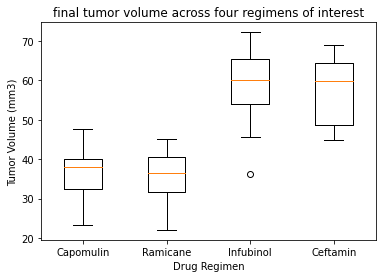

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = {}
for x in options:
    data[x] = four_drug_df[four_drug_df['Drug Regimen'] == x].reset_index(drop=True)

fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume across four regimens of interest')
dt = [data['Capomulin']['Tumor Volume (mm3)'],data['Ramicane']['Tumor Volume (mm3)'],data['Infubinol']['Tumor Volume (mm3)'],data['Ceftamin']['Tumor Volume (mm3)']]
ax1.boxplot(dt)

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],options)

plt.show()

## Line and Scatter Plots

In [18]:
#create data frame of the mouse treated with Capomulin
capomulin_drug_df = trimmed_df.loc[(trimmed_df['Drug Regimen'] == 'Capomulin')]
#create list of mice in the treatment group by dropping any duplicate entries in df 
#then converting to a list and selecting a random mouse out of list
capomulin_mouse = capomulin_drug_df.drop_duplicates(subset = ['Mouse ID'], keep = 'first')
mouse_list = capomulin_mouse['Mouse ID'].values.tolist()
mouse = random.choice(mouse_list)
#get dataframe from random mouse selection and round values to make plot more presentable
capomulin_mouse_df = trimmed_df.loc[(trimmed_df['Mouse ID'] == mouse)].round(3)


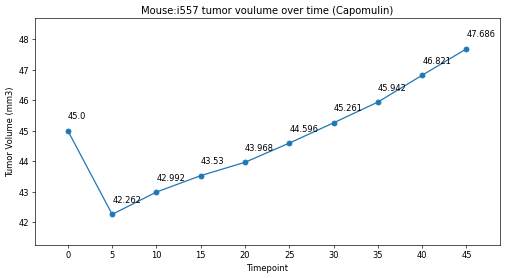

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#https://datatofish.com/convert-pandas-dataframe-to-list/

fig, ax = plt.subplots(figsize = (10,5), dpi=60)

x_axis = np.arange(0, len(capomulin_mouse_df))
tick_loc = []
y_axis = capomulin_mouse_df['Tumor Volume (mm3)']
for x in x_axis:
    tick_loc.append(x)

plt.title(f'Mouse:{mouse} tumor voulume over time (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(-0.75,len(capomulin_mouse_df)-0.25)
plt.ylim(min(capomulin_mouse_df['Tumor Volume (mm3)'])-1,max(capomulin_mouse_df['Tumor Volume (mm3)'])+1)


ax.plot(x_axis,y_axis, marker='o')

for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+0.4 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.xticks(tick_loc,capomulin_mouse_df['Timepoint'])



plt.show()

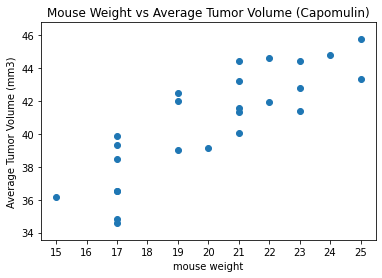

In [20]:
#create data frame mouse weight and tumor volume for the Capomulin regimen the calculate average tumor volume
capomulin_group_df = capomulin_drug_df[['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby(['Mouse ID'])
capomulin_av_tumor = capomulin_group_df.mean()
capomulin_av_tumor = capomulin_av_tumor.rename(columns={'Tumor Volume (mm3)': 'Average Tumor'})

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_axis = capomulin_av_tumor['Weight (g)']
y_axis = capomulin_av_tumor['Average Tumor']

plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.xlim(-0.5 + min (capomulin_av_tumor['Weight (g)']),max(capomulin_av_tumor['Weight (g)'])+0.5)
plt.ylim(min(capomulin_av_tumor['Average Tumor'])-1,max(capomulin_av_tumor['Average Tumor'])+1)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(min(capomulin_av_tumor['Weight (g)']), max(capomulin_av_tumor['Weight (g)'])+1, step=1))


plt.show()

## Correlation and Regression

the correlation coefficient is: 0.84


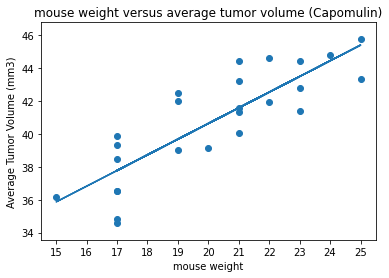

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_slope, tumor_int, tumor_r, tumor_p, tumor_std_err = st.linregress(capomulin_av_tumor['Weight (g)'], capomulin_av_tumor['Average Tumor'])
tumor_fit = tumor_slope * capomulin_av_tumor['Weight (g)'] + tumor_int

plt.title('mouse weight versus average tumor volume (Capomulin)')
plt.xlabel('mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.xlim(-0.5 + min (capomulin_av_tumor['Weight (g)']),max(capomulin_av_tumor['Weight (g)'])+0.5)
plt.ylim(min(capomulin_av_tumor['Average Tumor'])-1,max(capomulin_av_tumor['Average Tumor'])+1)
plt.xticks(np.arange(min(capomulin_av_tumor['Weight (g)']), max(capomulin_av_tumor['Weight (g)'])+1, step=1))

plt.scatter(x_axis,y_axis)
plt.plot(capomulin_av_tumor['Weight (g)'],tumor_fit)
correlation = st.pearsonr(capomulin_av_tumor['Weight (g)'],capomulin_av_tumor['Average Tumor'])
print(f"the correlation coefficient is: {round(correlation[0],2)}")

In [23]:
#observation 1: 6 out of the 9 drugs are no different than the placebo all being within 4% of the placebo in terms of mice left at the end of the trial.
# Capomulin and Ramicane appear to improve mouse survival rates with with both drugs having 26% more mice than the placebo by the end of the trial.
# Propriva on the other hand had the inverse effect with a final count that was 86% of the placebo group, implying that taking Propriva is worse for survival than taking a drug that does nothing
group_summary.head(10)

,mean,median,variance,std_dev,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862,156
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [22]:
#observation 2: Eyeballing the box and whisker plots Capomulin and Ramicane are likely statistically different from Infubinol and Ceftamin in terms of the effect on tumor size.
# With the upper bounds of Capomulin and Ramicane being roughly on the lower bounds of Infubinol and Ceftamin, idicating that the vast majority Capomulin and Ramicane final tumor size are outliers from Infubinol and Ceftamin.
# t tests should be used to determine whether there is statistcal difference or not


In [ ]:
#observation 3: Looking at the final graph at the end we can see that mouse weight is highly coorelated with tumor volume with the correlation coefficient being 0.84. 
#Meaning as weight increases there is a high likelihood tumor size will be larger than that in smaller mice